In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D,Conv2D,BatchNormalization,MaxPooling2D,Flatten,Dropout,MaxPool2D
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import os

# Specify the path to your folder containing images
folder_path = 'archive'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive",
    shuffle = True,
    seed = 16,
    image_size = (244,244),
    batch_size = 32
)

Found 14682 files belonging to 12 classes.


In [3]:
train = dataset.take(int(len(dataset) * 0.8))
rem = dataset.skip(int(len(dataset) * 0.8))
vaild = rem.take(int(len(rem) * 0.5))
test = rem.skip(int(len(rem) * 0.5))

In [4]:
class_n = dataset.class_names
class_n

['fresh_apple',
 'fresh_banana',
 'fresh_bitter_gourd',
 'fresh_capsicum',
 'fresh_orange',
 'fresh_tomato',
 'stale_apple',
 'stale_banana',
 'stale_bitter_gourd',
 'stale_capsicum',
 'stale_orange',
 'stale_tomato']

In [5]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1.0/255))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,244,244,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(12,activation='softmax'))
model.build(input_shape=(32,244,244,3))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 244, 244, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 242, 242, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 121, 121, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 119, 119, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 59, 59, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 57, 57, 64)          3

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
e=EarlyStopping(patience=3, monitor='val_loss')

In [9]:
history = model.fit(train,epochs=50,validation_data=vaild, callbacks=e)

Epoch 1/50


367/367 [==============================] - 48s 114ms/step - loss: 1.4132 - accuracy: 0.5237 - val_loss: 1.2069 - val_accuracy: 0.6264
Epoch 2/50
367/367 [==============================] - 41s 112ms/step - loss: 0.8059 - accuracy: 0.7231 - val_loss: 0.5031 - val_accuracy: 0.8404
Epoch 3/50
367/367 [==============================] - 41s 112ms/step - loss: 0.5946 - accuracy: 0.7904 - val_loss: 0.3814 - val_accuracy: 0.8743
Epoch 4/50
367/367 [==============================] - 41s 112ms/step - loss: 0.4928 - accuracy: 0.8291 - val_loss: 0.4727 - val_accuracy: 0.8288
Epoch 5/50
367/367 [==============================] - 41s 111ms/step - loss: 0.4397 - accuracy: 0.8431 - val_loss: 0.2672 - val_accuracy: 0.9029
Epoch 6/50
367/367 [==============================] - 41s 112ms/step - loss: 0.3742 - accuracy: 0.8690 - val_loss: 0.2189 - val_accuracy: 0.9212
Epoch 7/50
367/367 [==============================] - 43s 116ms/step - loss: 0.3425 - accuracy: 0.8772 - val_loss: 0.2193 - val_accuracy: 0.9

In [19]:
score = model.evaluate(test)
score

46/46 [==============================] - 11s 38ms/step - loss: 0.2274 - accuracy: 0.9345


[0.22738851606845856, 0.9345157146453857]

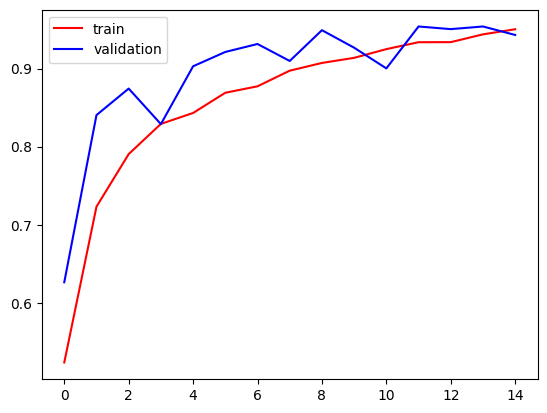

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

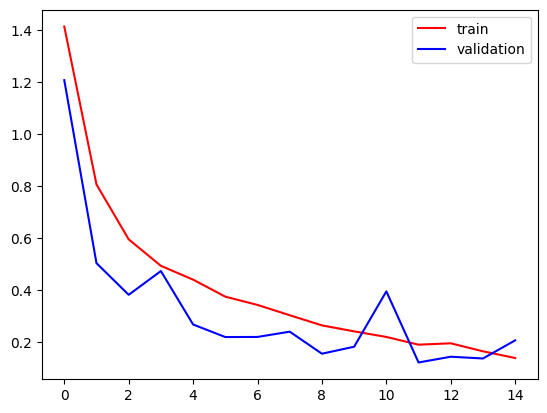

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

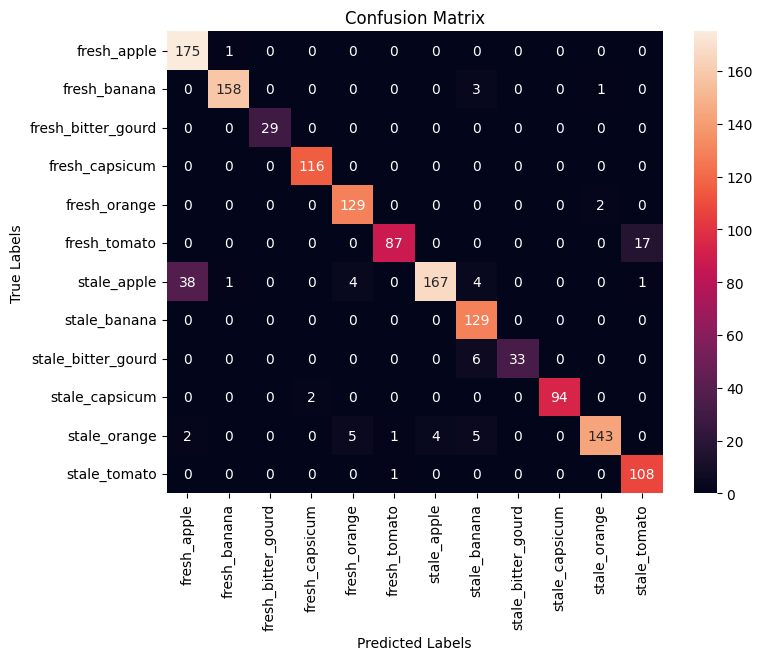

In [22]:
# Get the predicted labels for the test set
predicted_labels = []
true_labels = []

for images, labels in test:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=class_n, yticklabels=class_n)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
y_true_test = []
y_pred_classes_test = []

# Iterate through the testing dataset to get true labels and predictions
for images, labels in test:
    y_true_test.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    y_pred_classes_test.extend(np.argmax(predictions, axis=1))


# Calculate and print the classification report
report_test_ResNet50 = classification_report(y_true_test, y_pred_classes_test, target_names=class_n)

print(report_test_ResNet50)

                    precision    recall  f1-score   support

       fresh_apple       0.81      0.99      0.89       169
      fresh_banana       0.99      0.97      0.98       156
fresh_bitter_gourd       1.00      1.00      1.00        32
    fresh_capsicum       0.98      1.00      0.99       116
      fresh_orange       0.94      0.98      0.96       133
      fresh_tomato       0.98      0.85      0.91       105
       stale_apple       0.98      0.79      0.87       216
      stale_banana       0.87      1.00      0.93       132
stale_bitter_gourd       1.00      0.82      0.90        39
    stale_capsicum       1.00      0.98      0.99        99
      stale_orange       0.97      0.89      0.93       160
      stale_tomato       0.86      0.99      0.92       109

          accuracy                           0.93      1466
         macro avg       0.95      0.94      0.94      1466
      weighted avg       0.94      0.93      0.93      1466



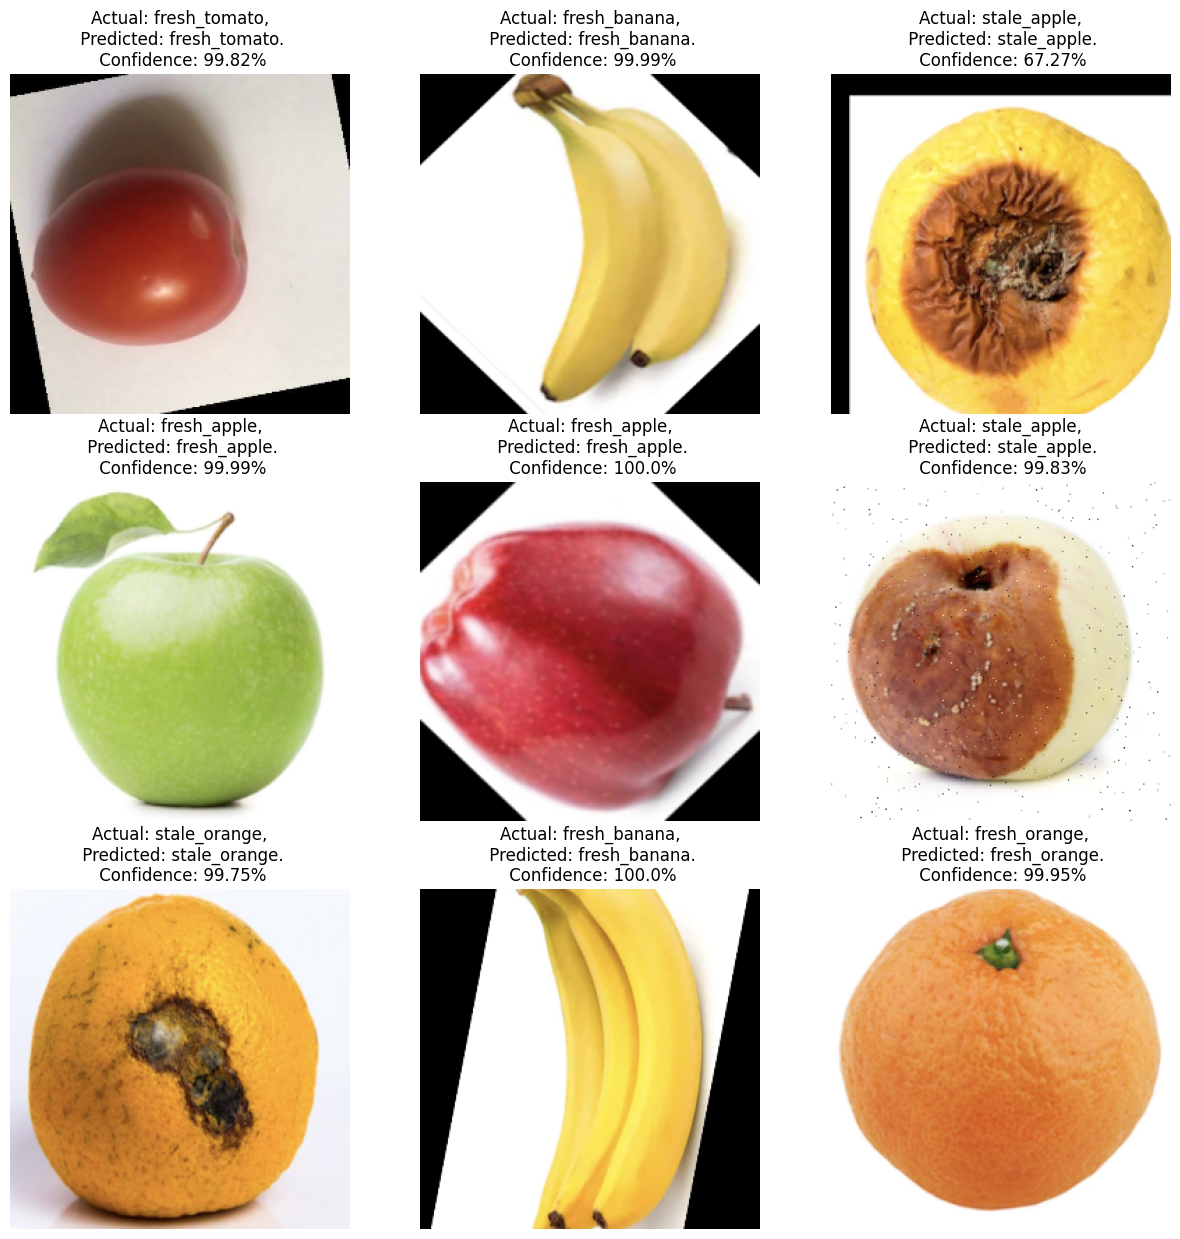

In [15]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array, verbose=0)

    predicted_class = class_n[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_n[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [16]:
model.save("Models/V2")

INFO:tensorflow:Assets written to: Models/V2\assets


INFO:tensorflow:Assets written to: Models/V2\assets


In [24]:
model = models.load_model("Models/V2")

In [25]:
model.evaluate(test)

46/46 [==============================] - 11s 38ms/step - loss: 0.2364 - accuracy: 0.9325


[0.2363673597574234, 0.9324693083763123]